In [1]:
from fastai.vision import *

In [2]:
folder = 'juanpis'
file = 'juanpis.csv'

path = Path('photos')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [3]:
folder = 'steve'
file = 'steve.csv'

path = Path('photos')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [5]:
classes = ['juanpis','steve']

In [6]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

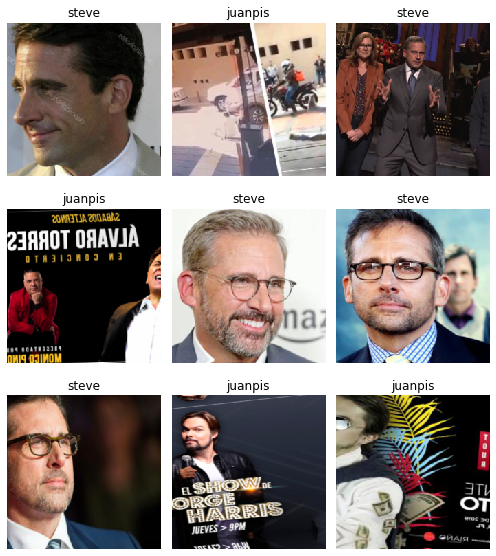

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['juanpis', 'steve'], 2, 306, 76)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.036278,0.156360,0.092105,02:08
1,0.718391,0.103067,0.039474,02:22
2,0.557938,0.121503,0.026316,02:53
3,0.454993,0.124238,0.052632,02:23


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

Traceback (most recent call last):
  File "/Users/DMA/anaconda3/envs/dl/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/DMA/anaconda3/envs/dl/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/DMA/anaconda3/envs/dl/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/DMA/anaconda3/envs/dl/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 